In [1]:
from datetime import timedelta
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
from models import ffwReg
import scipy as sp
import seaborn as sns
sns.set(font_scale=1.75)
from sklearn import metrics

In [2]:
# Parameters:
inpDir = "./IO_Deplo/"
resultsLst = ['results_NNG20_3X32', 'results_NNG20_3X32_ValOpt1']
filterByValues = False
filterByTimeStamp = True
timeStamp = '2020-07-01 00:00:00'


MAE = 0.14238281040669634
R2 = -0.6241323887673678


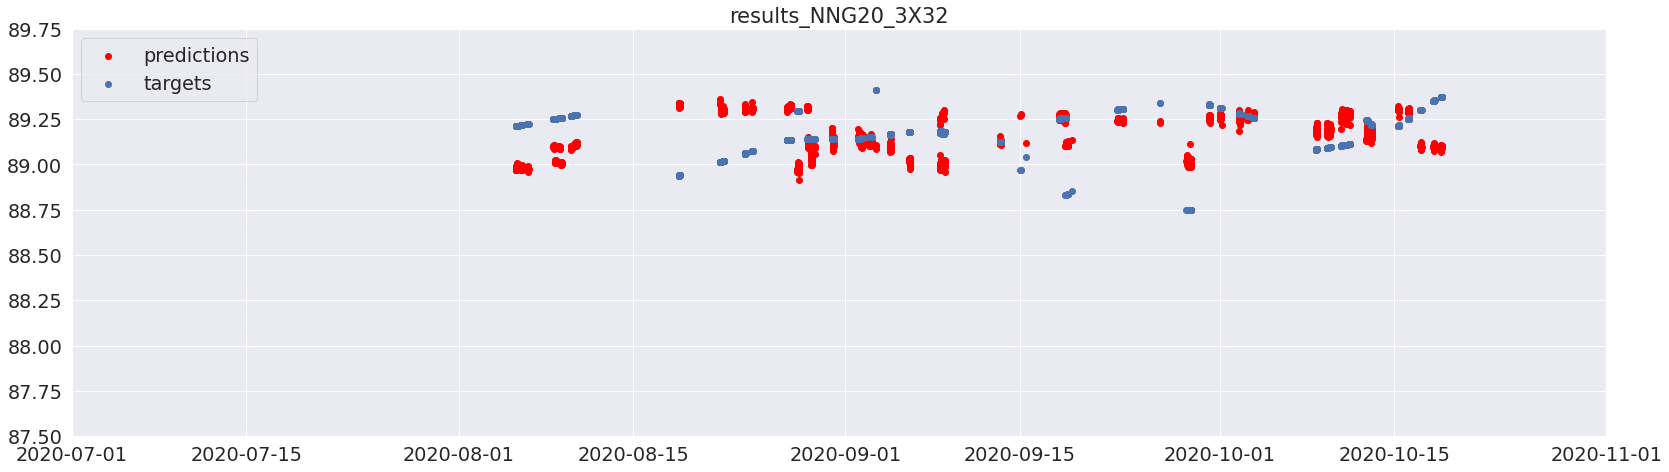


MAE = 0.16753915685769166
R2 = -3.3161767208307023


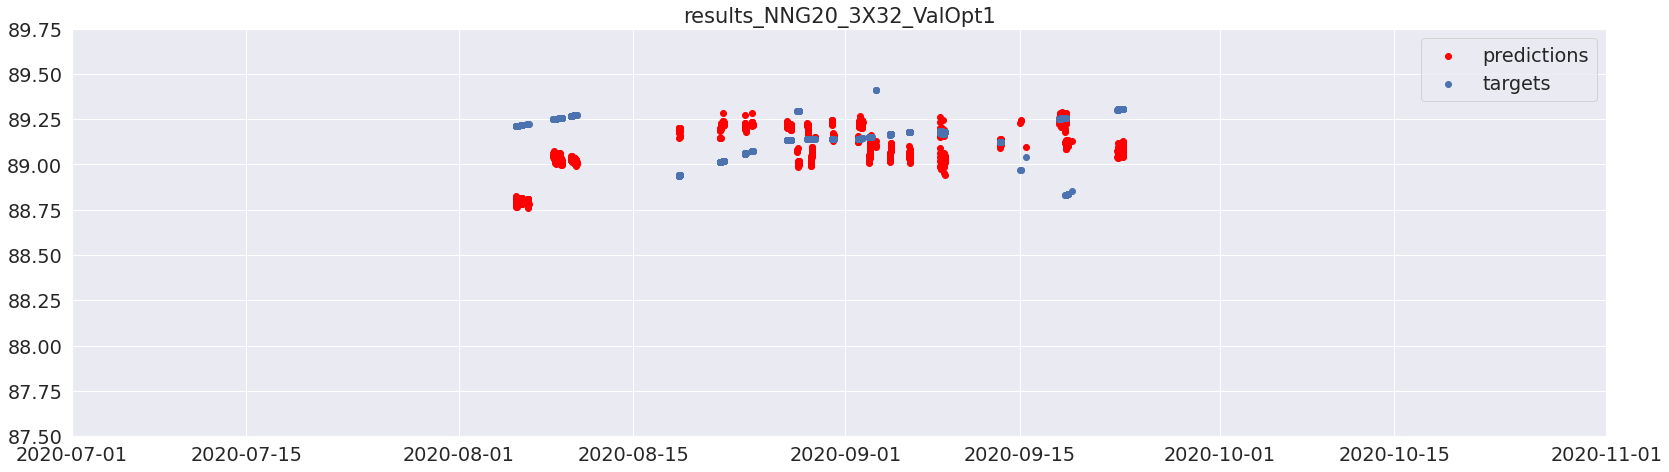

In [3]:
# get predictions on test sets, compute losses and make plots

# # debug 
# # plot all the samples
# # verify that timestamps in inpDF correspond to timeStamps from results dictionary
# # test passed
# with open(inpDir + 'N34V_InputDict.pkl', 'rb') as file:
#     inpDict = pickle.load(file)
# inpDF = inpDict['DataFrame']
# if filterByTimeStamp:
#     ts = pd.to_datetime(timeStamp)
#     inpDF = inpDF[inpDF['Time'] >= ts]
# plt.figure(figsize=(27.5, 7.5))
# plt.scatter(inpDF['Time'], inpDF['Associated_angle_model'], label='targets')
# plt.ylim(87.50, 89.75)
# plt.legend()
# plt.show()

for result in resultsLst:

    # load preds and targs
    with open(inpDir + result +  '.pkl', 'rb') as file:
        resDict = pickle.load(file)

    pre = np.hstack(resDict['Predictions'])
    tar = np.vstack(resDict['Targets'])
    timeStamps = np.hstack(resDict['TimeStamps'])
    
    if filterByValues:
        inds = np.where((pre>0) & (pre<100))[0]
        pre = pre[inds]
        tar = tar[inds]

    if filterByTimeStamp:
        ts = pd.to_datetime(timeStamp)
        inds = np.where(timeStamps >= ts)[0]
        pre = pre[inds]
        tar = tar[inds]
        timeStamps = timeStamps[inds]

    # get metrics
    mae = metrics.mean_absolute_error(tar, pre)
    r2 = metrics.r2_score(tar, pre)

    # print metrics
    print()
    print('MAE =', mae)
    print('R2 =', r2)

    # plot
    xL = pd.to_datetime('2020-07-01 00:00:00')
    xR = pd.to_datetime('2020-11-01 00:00:00')
    plt.figure(figsize=(27.5, 7.5))
    plt.scatter(timeStamps, pre, color='red', label='predictions')
    plt.scatter(timeStamps, tar, label='targets')
    plt.xlim(xL, xR)
    plt.ylim(87.50, 89.75)
    plt.title(result)
    plt.legend()
    plt.show()